<a href="https://colab.research.google.com/github/Purushotham011/Gen-AI/blob/main/Exp3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  !pip install torch torchvision
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

In [ ]:
class Generator(nn.Module):
  def __init__(self, z_dim):
    super(Generator,self).__init__()
    self.fc1=nn.Linear(z_dim,128)
    self.fc2=nn.Linear(128,256)
    self.fc3=nn.Linear(256,512)
    self.fc4=nn.Linear(512,1024)
    self.fc5=nn.Linear(1024,28*28)
    self.relu=nn.ReLU()
    self.tanh=nn.Tanh()

  def forward(self,z):
    # Fix: Correctly call self.relu and self.fc1
    x=self.relu(self.fc1(z))  # Removed extra self and added self. to fc1
    x=self.relu(self.fc2(x))
    x=self.relu(self.fc3(x))
    x=self.relu(self.fc4(x))
    x=self.tanh(self.fc5(x))
    return x.view(x.size(0),1,28,28)


In [ ]:
class Critic(nn.Module):
  def __init__(self):
    super(Critic,self).__init__()
    self.fc1=nn.Linear(28*28,1024)
    self.fc2=nn.Linear(1024,512)
    self.fc3=nn.Linear(512,256)
    self.fc4=nn.Linear(256,1)
    self.leaky_relu=nn.LeakyReLU(0.2)

  def forward(self,x):
    x=x.view(x.size(0),-1)
    x=self.leaky_relu(self.fc1(x))
    x=self.leaky_relu(self.fc2(x))
    x=self.leaky_relu(self.fc3(x))
    x=self.fc4(x)
    return x # Modified: Removed the extra call to self.fc4

In [ ]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])

train_dataset=torchvision.datasets.MNIST(root='./data',train=True,download=True,transform=transform)
test_dataset=DataLoader(train_dataset,batch_size=64,shuffle=True)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 11.5MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 345kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.20MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 9.60MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
def mussertein_loss(y_true, y_pred):
  return torch.mean(y_true*y_pred)

/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:825: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at ../aten/src/ATen/cuda/CublasHandlePool.cpp:135.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch [1/100], Critic Loss: -8.6637, Generator Loss: 4.5653


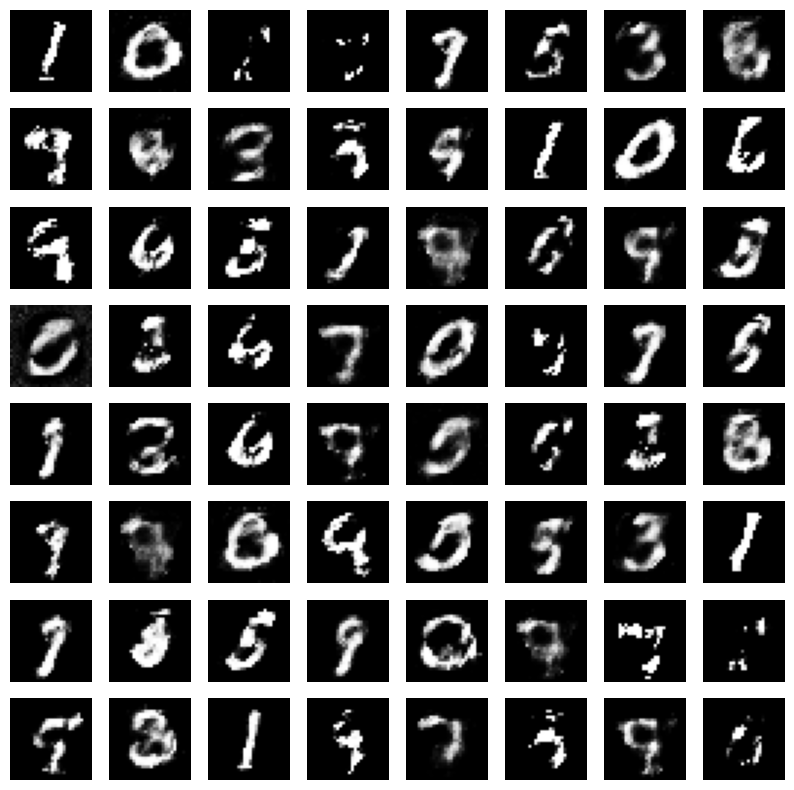

Epoch [2/100], Critic Loss: -6.3081, Generator Loss: 3.6917
Epoch [3/100], Critic Loss: -6.7787, Generator Loss: 2.8978
Epoch [4/100], Critic Loss: -6.4931, Generator Loss: 5.2944
Epoch [5/100], Critic Loss: -5.0137, Generator Loss: 2.4371
Epoch [6/100], Critic Loss: -5.0061, Generator Loss: 4.4873
Epoch [7/100], Critic Loss: -4.1859, Generator Loss: 1.9495
Epoch [8/100], Critic Loss: -5.2011, Generator Loss: 5.2084
Epoch [9/100], Critic Loss: -4.9744, Generator Loss: -2.2268
Epoch [10/100], Critic Loss: -4.3760, Generator Loss: 1.8367
Epoch [11/100], Critic Loss: -4.5691, Generator Loss: -0.6704


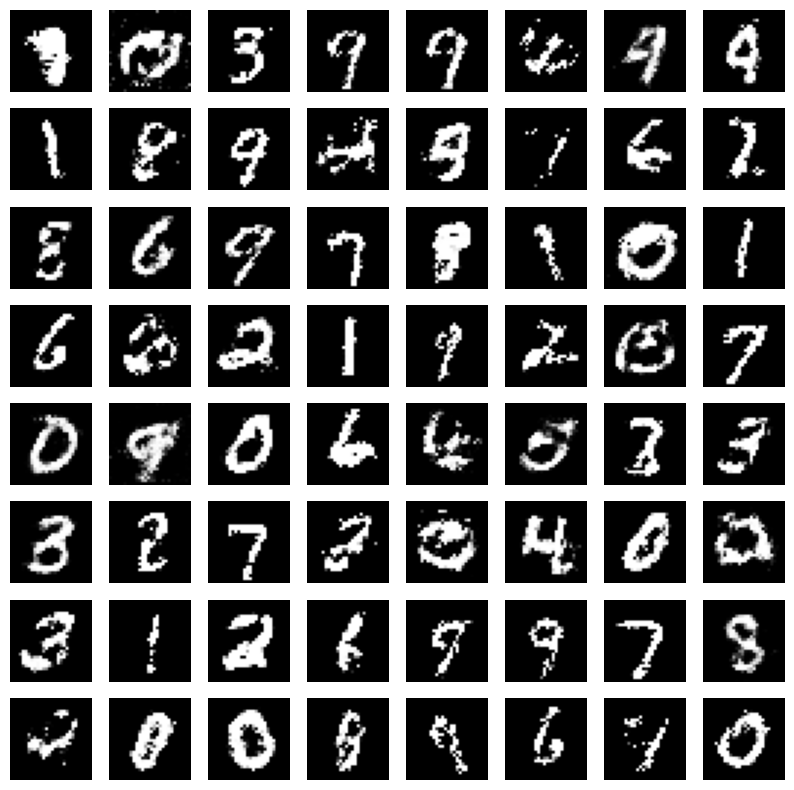

Epoch [12/100], Critic Loss: -4.8541, Generator Loss: -1.9409
Epoch [13/100], Critic Loss: -5.2266, Generator Loss: 1.2401
Epoch [14/100], Critic Loss: -4.5618, Generator Loss: 1.3507
Epoch [15/100], Critic Loss: -4.5372, Generator Loss: 2.1052
Epoch [16/100], Critic Loss: -4.2073, Generator Loss: -2.5945
Epoch [17/100], Critic Loss: -4.7087, Generator Loss: -4.5797
Epoch [18/100], Critic Loss: -5.6368, Generator Loss: -4.7733
Epoch [19/100], Critic Loss: -4.3884, Generator Loss: 0.3803
Epoch [20/100], Critic Loss: -4.3849, Generator Loss: -0.5405
Epoch [21/100], Critic Loss: -4.6848, Generator Loss: -0.6795


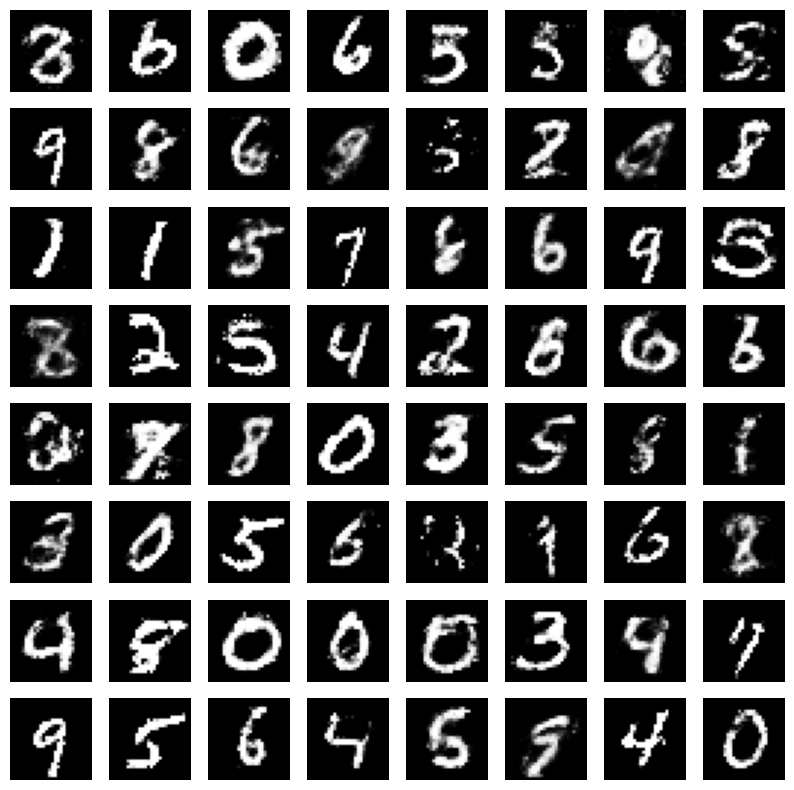

Epoch [22/100], Critic Loss: -3.0410, Generator Loss: 0.3578
Epoch [23/100], Critic Loss: -3.9611, Generator Loss: 2.0883
Epoch [24/100], Critic Loss: -3.7336, Generator Loss: -2.3457
Epoch [25/100], Critic Loss: -6.7568, Generator Loss: 9.5847
Epoch [26/100], Critic Loss: -3.7624, Generator Loss: 0.9342
Epoch [27/100], Critic Loss: -4.4008, Generator Loss: 2.8195
Epoch [28/100], Critic Loss: -4.5923, Generator Loss: -0.4096
Epoch [29/100], Critic Loss: -2.9969, Generator Loss: -4.6819
Epoch [30/100], Critic Loss: -2.8512, Generator Loss: 2.7910
Epoch [31/100], Critic Loss: -3.7957, Generator Loss: -2.4895


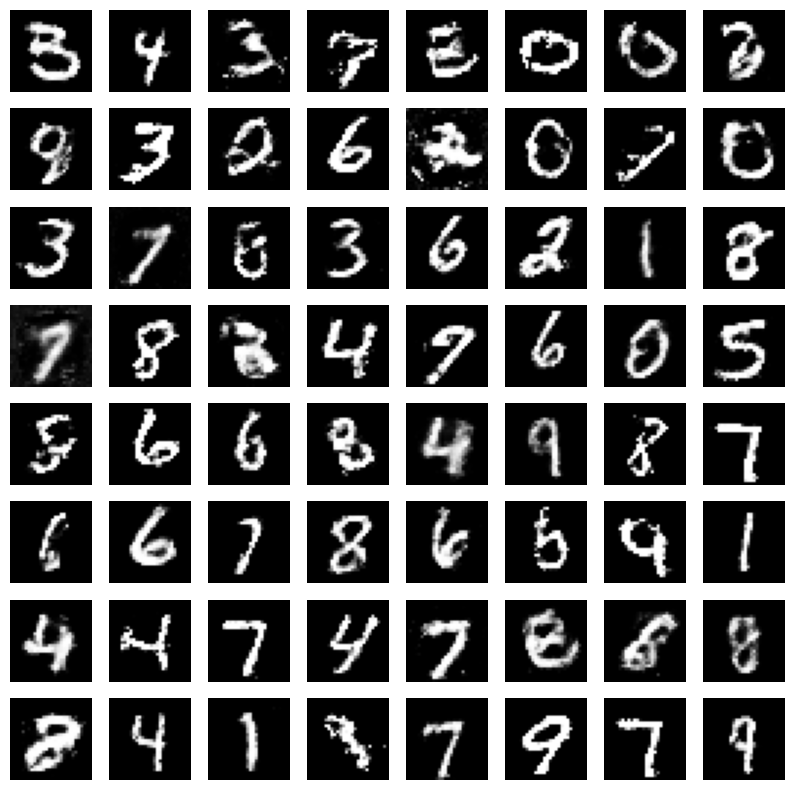

Epoch [32/100], Critic Loss: -4.3566, Generator Loss: -2.1249
Epoch [33/100], Critic Loss: -3.6363, Generator Loss: -0.4600
Epoch [34/100], Critic Loss: -4.6543, Generator Loss: -4.3580
Epoch [35/100], Critic Loss: -3.3143, Generator Loss: -0.0221
Epoch [36/100], Critic Loss: -3.6623, Generator Loss: 4.5638
Epoch [37/100], Critic Loss: -2.6238, Generator Loss: 3.4735
Epoch [38/100], Critic Loss: -3.4599, Generator Loss: 3.9858
Epoch [39/100], Critic Loss: -3.7834, Generator Loss: 1.6105
Epoch [40/100], Critic Loss: -3.2191, Generator Loss: -2.8998
Epoch [41/100], Critic Loss: -4.3930, Generator Loss: -3.0847


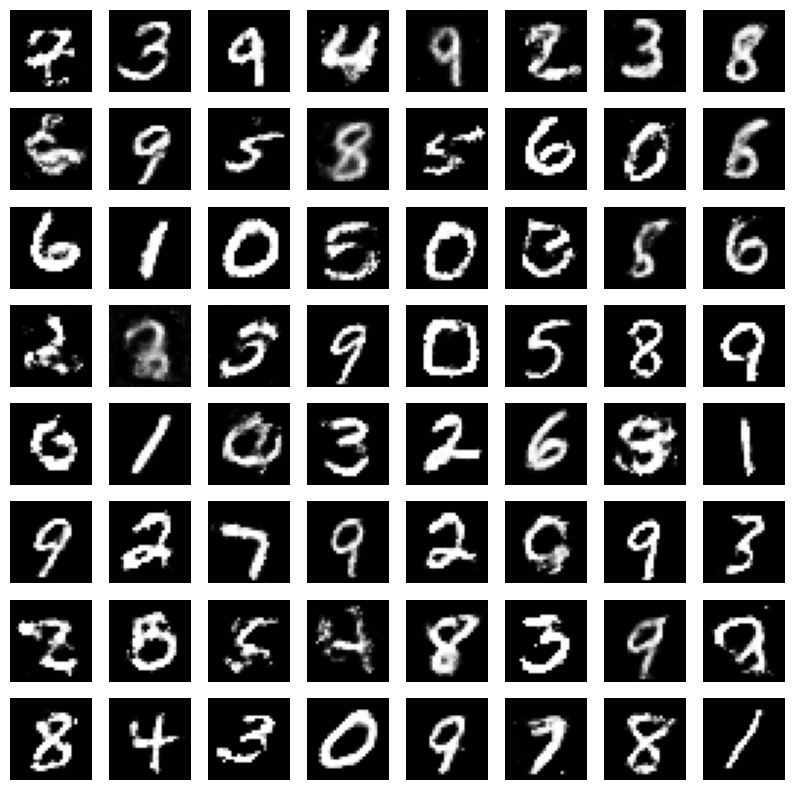

Epoch [42/100], Critic Loss: -4.0131, Generator Loss: 4.8902
Epoch [43/100], Critic Loss: -3.4654, Generator Loss: -7.6608
Epoch [44/100], Critic Loss: -2.5535, Generator Loss: -5.0018
Epoch [45/100], Critic Loss: -4.1262, Generator Loss: 1.6721
Epoch [46/100], Critic Loss: -3.3998, Generator Loss: 4.6177
Epoch [47/100], Critic Loss: -3.4522, Generator Loss: -5.5747
Epoch [48/100], Critic Loss: -2.2820, Generator Loss: -1.0257
Epoch [49/100], Critic Loss: -2.4386, Generator Loss: 7.4709
Epoch [50/100], Critic Loss: -1.3836, Generator Loss: -1.3823
Epoch [51/100], Critic Loss: -1.6588, Generator Loss: -1.7639


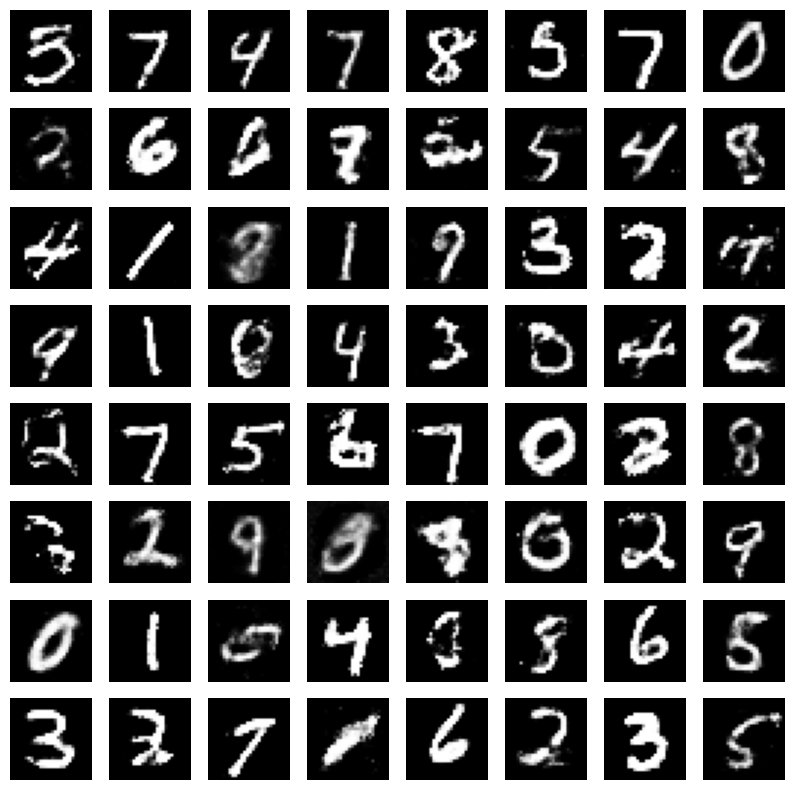

Epoch [52/100], Critic Loss: -2.2350, Generator Loss: 0.3511
Epoch [53/100], Critic Loss: -3.4909, Generator Loss: 3.1546
Epoch [54/100], Critic Loss: -3.5160, Generator Loss: 3.8732
Epoch [55/100], Critic Loss: -2.7480, Generator Loss: -2.4099
Epoch [56/100], Critic Loss: -2.3709, Generator Loss: -0.1118
Epoch [57/100], Critic Loss: -3.3183, Generator Loss: 1.8757
Epoch [58/100], Critic Loss: -1.9805, Generator Loss: -0.1959
Epoch [59/100], Critic Loss: -1.8743, Generator Loss: -7.4902
Epoch [60/100], Critic Loss: -2.1923, Generator Loss: -1.6529
Epoch [61/100], Critic Loss: -1.2982, Generator Loss: -6.5750


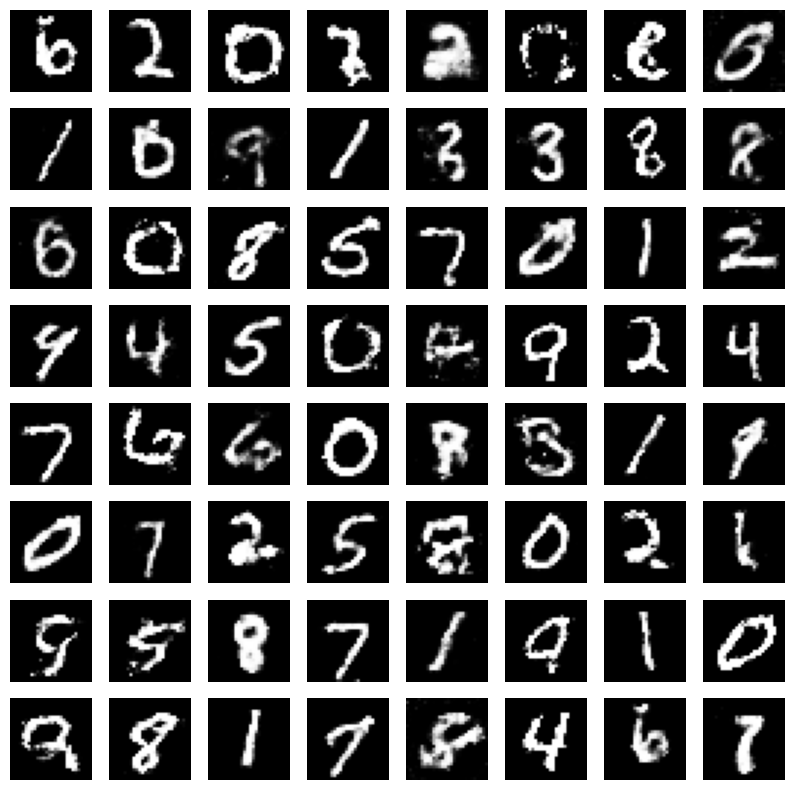

Epoch [62/100], Critic Loss: -2.0324, Generator Loss: 6.8714
Epoch [63/100], Critic Loss: -1.5442, Generator Loss: -6.2648
Epoch [64/100], Critic Loss: -2.3670, Generator Loss: -6.7819
Epoch [65/100], Critic Loss: -1.6662, Generator Loss: -0.4856
Epoch [66/100], Critic Loss: -2.8395, Generator Loss: 0.2767
Epoch [67/100], Critic Loss: -2.0829, Generator Loss: 0.2871
Epoch [68/100], Critic Loss: -2.0127, Generator Loss: -8.3455
Epoch [69/100], Critic Loss: -1.7327, Generator Loss: 2.0598
Epoch [70/100], Critic Loss: -2.6757, Generator Loss: -11.2317
Epoch [71/100], Critic Loss: -2.3049, Generator Loss: -6.6860


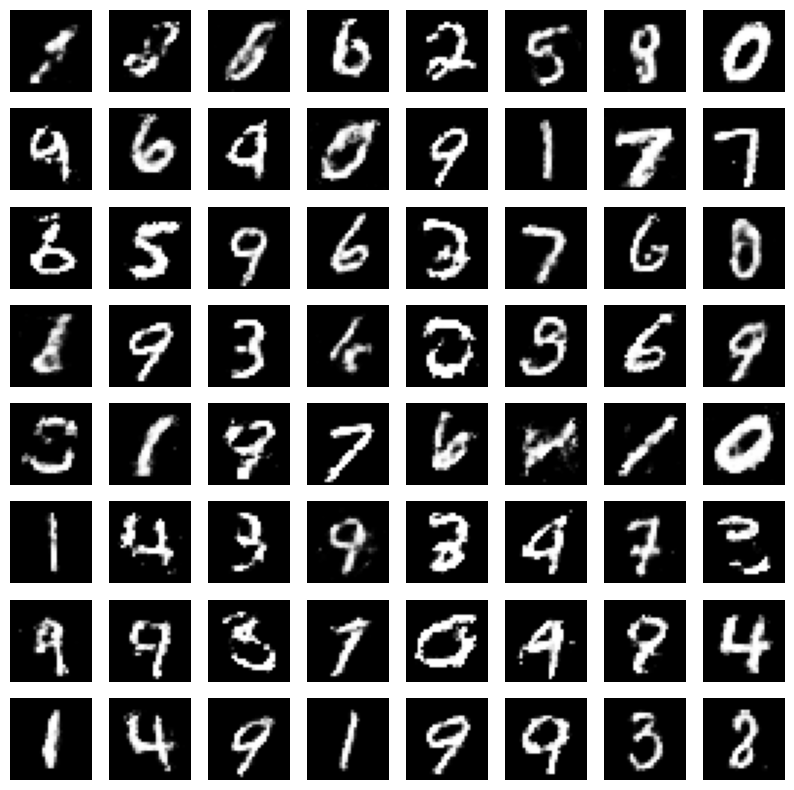

Epoch [72/100], Critic Loss: -2.4008, Generator Loss: -3.2460
Epoch [73/100], Critic Loss: -2.4563, Generator Loss: 12.7198
Epoch [74/100], Critic Loss: -1.6238, Generator Loss: 4.0245
Epoch [75/100], Critic Loss: -1.4226, Generator Loss: -5.3804
Epoch [76/100], Critic Loss: -2.7262, Generator Loss: 7.6286
Epoch [77/100], Critic Loss: -2.2394, Generator Loss: -11.0608
Epoch [78/100], Critic Loss: -1.2037, Generator Loss: -10.8804
Epoch [79/100], Critic Loss: -1.4502, Generator Loss: -4.5869
Epoch [80/100], Critic Loss: -2.3234, Generator Loss: 13.0613
Epoch [81/100], Critic Loss: -1.4896, Generator Loss: -0.6235


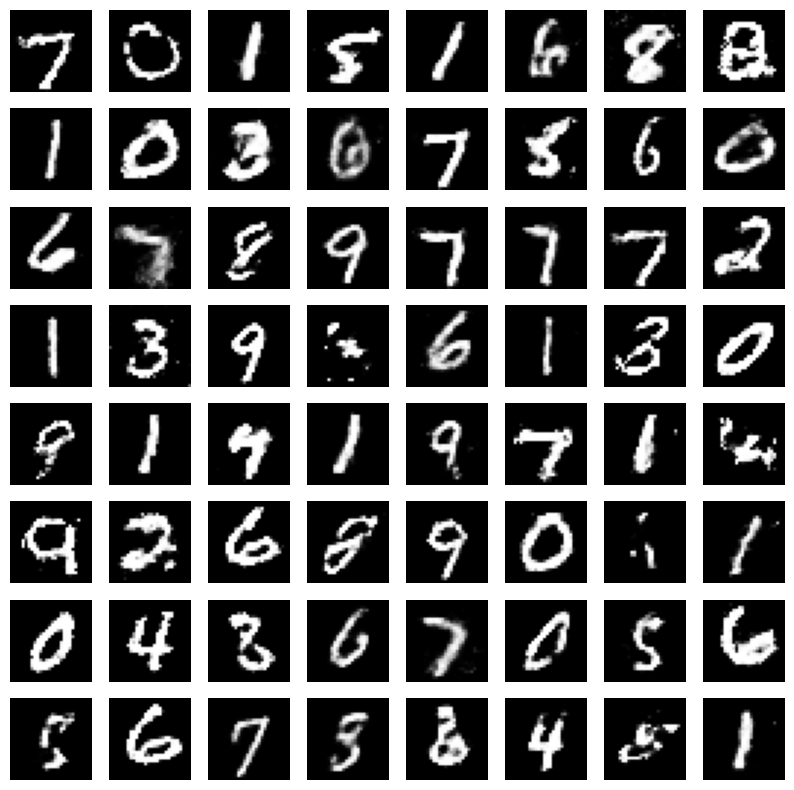

Epoch [82/100], Critic Loss: -1.1001, Generator Loss: 0.2849
Epoch [83/100], Critic Loss: -2.1231, Generator Loss: 8.7174
Epoch [84/100], Critic Loss: -0.9911, Generator Loss: -8.9231
Epoch [85/100], Critic Loss: -2.5516, Generator Loss: -11.9355
Epoch [86/100], Critic Loss: -1.4615, Generator Loss: 12.4625
Epoch [87/100], Critic Loss: -1.8267, Generator Loss: -6.5226
Epoch [88/100], Critic Loss: -1.1010, Generator Loss: -0.9779
Epoch [89/100], Critic Loss: -3.0841, Generator Loss: 6.6639
Epoch [90/100], Critic Loss: -2.2192, Generator Loss: -1.0034
Epoch [91/100], Critic Loss: -1.3317, Generator Loss: 9.5591


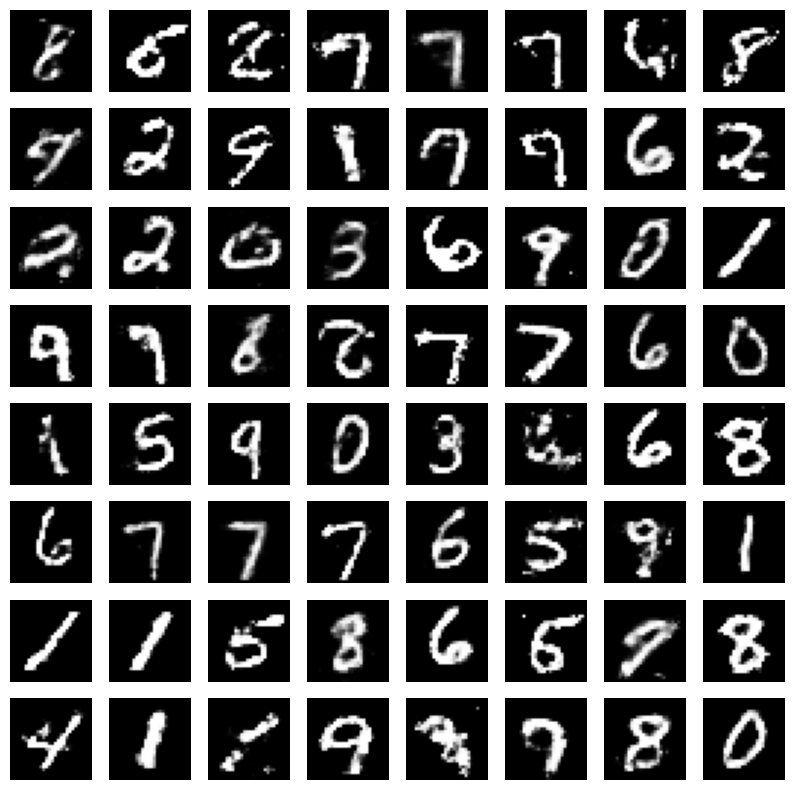

Epoch [92/100], Critic Loss: -2.5540, Generator Loss: -19.7599
Epoch [93/100], Critic Loss: -1.7141, Generator Loss: -5.3343
Epoch [94/100], Critic Loss: -1.8831, Generator Loss: -2.1716
Epoch [95/100], Critic Loss: -2.2565, Generator Loss: -15.7239
Epoch [96/100], Critic Loss: -1.7398, Generator Loss: -8.9950
Epoch [97/100], Critic Loss: -1.8890, Generator Loss: -9.3206
Epoch [98/100], Critic Loss: -2.0276, Generator Loss: -2.2202
Epoch [99/100], Critic Loss: -1.3849, Generator Loss: -15.7378
Epoch [100/100], Critic Loss: -2.2333, Generator Loss: -10.0972


In [ ]:

def compute_gradient_penalty(critic, real_images, fake_images, device, lambda_gp=10):
    batch_size, C, H, W = real_images.size()
    epsilon = torch.rand((batch_size, 1, 1, 1)).to(device)  # Random epsilon for interpolation
    interpolated_images = epsilon * real_images + (1 - epsilon) * fake_images  # Linear interpolation
    interpolated_images.requires_grad_(True)

    # Forward pass through critic (discriminator)
    interpolated_scores = critic(interpolated_images)

    # Compute gradients w.r.t. the interpolated images
    gradients = torch.autograd.grad(
        outputs=interpolated_scores,
        inputs=interpolated_images,
        grad_outputs=torch.ones_like(interpolated_scores),
        create_graph=True,
        retain_graph=True,
        only_inputs=True
    )[0]  # Gradients w.r.t. images

    # Compute the norm of the gradients
    gradient_norm = gradients.view(batch_size, -1).norm(2, dim=1)  # L2 norm of gradients
    gradient_penalty = ((gradient_norm - 1) ** 2).mean()  # Gradient penalty formula

    return lambda_gp * gradient_penalty

z_dim = 100
lr = 0.0005
n_critic = 5
lambda_gp = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize models
generator = Generator(z_dim).to(device)
critic = Critic().to(device)

# Optimizers
optimizer_g = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.9))
optimizer_c = optim.Adam(critic.parameters(), lr=lr, betas=(0.5, 0.9))

# Training loop
epochs = 100
for epoch in range(epochs):
    for i, (real_images, _) in enumerate(test_dataset):
        real_images = real_images.to(device)

        # Update the critic for n_critic steps
        for _ in range(n_critic):
            z = torch.randn(real_images.size(0), z_dim).to(device)  # Latent vector for fake images
            fake_images = generator(z)

            # Get critic scores for real and fake images
            critic_real = critic(real_images)
            critic_fake = critic(fake_images.detach())  # Detach fake images to avoid gradients through the generator

            # Compute gradient penalty
            gradient_penalty = compute_gradient_penalty(critic, real_images, fake_images, device, lambda_gp)

            # Critic loss: Wasserstein loss + gradient penalty
            critic_loss = -torch.mean(critic_real) + torch.mean(critic_fake) + gradient_penalty

            optimizer_c.zero_grad()
            critic_loss.backward()
            optimizer_c.step()

        # Update the generator
        z = torch.randn(real_images.size(0), z_dim).to(device)  # Latent vector for fake images
        fake_images = generator(z)
        critic_fake = critic(fake_images)

        # Generator loss: Negative critic score for fake images
        generator_loss = -torch.mean(critic_fake)

        optimizer_g.zero_grad()
        generator_loss.backward()
        optimizer_g.step()

    print(f'Epoch [{epoch+1}/{epochs}], Critic Loss: {critic_loss.item():.4f}, Generator Loss: {generator_loss.item():.4f}')

    # Visualization (every 10 epochs)
    if epoch % 10 == 0:
        with torch.no_grad():
            test_z = torch.randn(64, z_dim).to(device)  # Latent vector for generating test images
            generated_images = generator(test_z)
            generated_images = generated_images.cpu().data  # Move to CPU for plotting
            generated_images = generated_images.view(64, 28, 28)  # Reshape to 28x28 images

            # Plot generated images
            plt.figure(figsize=(10, 10))
            for i in range(64):
                plt.subplot(8, 8, i + 1)
                plt.imshow(generated_images[i], cmap='gray')
                plt.axis('off')
            plt.show()


